In [26]:
from sklearn import preprocessing
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.Max_columns", 500)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
rcParams['figure.figsize'] = 12,7


In [27]:
df=pd.read_excel('/content/drive/MyDrive/Multi_Arm_Bandit/Siggle_Agent_Optimizer/math_qsn_performance_10_b_3.xlsx', sheet_name='Sheet1')
pd.set_option('display.max_columns',45)
df.shape


(2000, 7)

(2000, 7)

In [28]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [29]:
df["performance"]=df["marks"]/df["milsec"] *100000
df

,milsec,problems,problem_cls,marks,performance,inv_milsec
0,67200.0,A,A,5,7.440476,0.148810
1,70860.0,A,A,5,7.056167,0.141123
2,71640.0,A,A,5,6.979341,0.139587
3,63540.0,A,A,5,7.869059,0.157381
4,61140.0,A,A,5,8.177952,0.163559
...,...,...,...,...,...,...
1995,154440.0,J,J,0,0.000000,0.064750
1996,208920.0,J,J,5,2.393261,0.047865
1997,170280.0,J,J,0,0.000000,0.058727
1998,190260.0,J,J,0,0.000000,0.052560


,milsec,problems,problem_cls,marks,performance,inv_milsec
0,67200.0,A,A,5,7.440476,0.148810
1,70860.0,A,A,5,7.056167,0.141123
2,71640.0,A,A,5,6.979341,0.139587
3,63540.0,A,A,5,7.869059,0.157381
4,61140.0,A,A,5,8.177952,0.163559
...,...,...,...,...,...,...
1995,154440.0,J,J,0,0.000000,0.064750
1996,208920.0,J,J,5,2.393261,0.047865
1997,170280.0,J,J,0,0.000000,0.058727
1998,190260.0,J,J,0,0.000000,0.052560


In [30]:
df['marks'].value_counts()

marks
5    1043
0     957
Name: count, dtype: int64

marks
5    1043
0     957
Name: count, dtype: int64

In [31]:
ndf=df.groupby(["problems"])["performance"].agg(['mean', 'std']).reset_index()
ndf

,problems,mean,std
0,A,6.942810,2.157048
1,B,2.930682,1.614925
2,C,4.387124,2.838595
3,D,2.696657,2.320989
4,E,1.883168,1.959180
5,F,1.755372,2.009040
6,G,1.095340,1.778794
7,H,0.708180,1.415214
8,I,1.639866,1.587250
9,J,0.489455,1.168460


,problems,mean,std
0,A,6.942810,2.157048
1,B,2.930682,1.614925
2,C,4.387124,2.838595
3,D,2.696657,2.320989
4,E,1.883168,1.959180
5,F,1.755372,2.009040
6,G,1.095340,1.778794
7,H,0.708180,1.415214
8,I,1.639866,1.587250
9,J,0.489455,1.168460


In [32]:
ndf.columns

Index(['problems', 'mean', 'std'], dtype='object')

Index(['problems', 'mean', 'std'], dtype='object')

In [33]:
ndf["derived_performance"]=ndf["mean"]/ndf["std"]
ndf

,problems,mean,std,derived_performance
0,A,6.942810,2.157048,3.218662
1,B,2.930682,1.614925,1.814748
2,C,4.387124,2.838595,1.545527
3,D,2.696657,2.320989,1.161857
4,E,1.883168,1.959180,0.961202
5,F,1.755372,2.009040,0.873737
6,G,1.095340,1.778794,0.615777
7,H,0.708180,1.415214,0.500405
8,I,1.639866,1.587250,1.033150
9,J,0.489455,1.168460,0.418889


,problems,mean,std,derived_performance
0,A,6.942810,2.157048,3.218662
1,B,2.930682,1.614925,1.814748
2,C,4.387124,2.838595,1.545527
3,D,2.696657,2.320989,1.161857
4,E,1.883168,1.959180,0.961202
5,F,1.755372,2.009040,0.873737
6,G,1.095340,1.778794,0.615777
7,H,0.708180,1.415214,0.500405
8,I,1.639866,1.587250,1.033150
9,J,0.489455,1.168460,0.418889


In [34]:
#x = ndf["derived_performance"].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#ndf["normalized_2"] = pd.DataFrame(x_scaled)

In [35]:
ndf["normalized"]=(ndf["derived_performance"]-ndf["derived_performance"].min())/(ndf["derived_performance"].max()-ndf["derived_performance"].min())

In [36]:
ndf["proba_f"]=5*ndf["derived_performance"]/ndf["derived_performance"].sum()
ndf["proba_f1"]=ndf["derived_performance"]/ndf["derived_performance"].sum()

In [37]:
ndf

,problems,mean,std,derived_performance,normalized,proba_f,proba_f1
0,A,6.942810,2.157048,3.218662,1.000000,1.325212,0.265042
1,B,2.930682,1.614925,1.814748,0.498562,0.747182,0.149436
2,C,4.387124,2.838595,1.545527,0.402403,0.636336,0.127267
3,D,2.696657,2.320989,1.161857,0.265367,0.478368,0.095674
4,E,1.883168,1.959180,0.961202,0.193699,0.395753,0.079151
5,F,1.755372,2.009040,0.873737,0.162459,0.359742,0.071948
6,G,1.095340,1.778794,0.615777,0.070323,0.253532,0.050706
7,H,0.708180,1.415214,0.500405,0.029115,0.206030,0.041206
8,I,1.639866,1.587250,1.033150,0.219397,0.425376,0.085075
9,J,0.489455,1.168460,0.418889,0.000000,0.172468,0.034494


,problems,mean,std,derived_performance,normalized,proba_f,proba_f1
0,A,6.942810,2.157048,3.218662,1.000000,1.325212,0.265042
1,B,2.930682,1.614925,1.814748,0.498562,0.747182,0.149436
2,C,4.387124,2.838595,1.545527,0.402403,0.636336,0.127267
3,D,2.696657,2.320989,1.161857,0.265367,0.478368,0.095674
4,E,1.883168,1.959180,0.961202,0.193699,0.395753,0.079151
5,F,1.755372,2.009040,0.873737,0.162459,0.359742,0.071948
6,G,1.095340,1.778794,0.615777,0.070323,0.253532,0.050706
7,H,0.708180,1.415214,0.500405,0.029115,0.206030,0.041206
8,I,1.639866,1.587250,1.033150,0.219397,0.425376,0.085075
9,J,0.489455,1.168460,0.418889,0.000000,0.172468,0.034494


In [38]:
ndf_lst=list(ndf.proba_f)
ndf_lst

[1.3252118609071697,
 0.7471818982683672,
 0.6363359050651408,
 0.47836837195755194,
 0.3957533349248545,
 0.35974164464003294,
 0.25353219693833173,
 0.20603034656954852,
 0.4253761980583467,
 0.17246824267065555]

[1.3252118609071697,
 0.7471818982683672,
 0.6363359050651408,
 0.47836837195755194,
 0.3957533349248545,
 0.35974164464003294,
 0.25353219693833173,
 0.20603034656954852,
 0.4253761980583467,
 0.17246824267065555]

In [39]:
len(ndf.normalized)

10

10

In [40]:

class Environment:
  """This is a simulated environment.
  In reality for model-free tasks, we would interact with a real environment
  """

  def __init__(self, probs):
       # Success probabilities for each arm.
       # In practice, we don't know these values. We want to find them.
        self.probs = probs

  def step(self, action):
        # Pull arm and get stochastic reward (1 for success, 0 for failure)
        return 1 if (np.random.random()  < self.probs[action]) else 0


class Agent:

  def __init__(self, nActions, eps):
        self.nActions = nActions # Number of actions
        self.eps = eps # probability of exploration vs exploitation.
        self.n = np.zeros(nActions, dtype=int) # action counts n(a)
        self.Q = np.zeros(nActions, dtype=float) # value Q(a)

  def update_Q(self, action, reward):
        # Update Q action-value given (action, reward)
        self.n[action] += 1
        # A computation efficient strategy to store the value function.
        # This is the average cumilative reward per action
        self.Q[action] += (1.0/self.n[action]) * (reward - self.Q[action])

  def get_action(self):
        # Epsilon-greedy policy
        if np.random.random() < self.eps: # explore
            return np.random.randint(self.nActions)
        else: # exploit
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))





def experiment(probs, N_episodes):
    """Start multi-armed bandit simulation"""
    env = Environment(probs) # initialize arm probabilities
    agent = Agent(len(env.probs), eps)  # initialize agent
    actions, rewards = [], []
    for episode in range(N_episodes):
        action = agent.get_action() # sample policy # integer correcponding to the arm taken.
        reward = env.step(action) # take step + get reward # integer 0/1
        agent.update_Q(action, reward) # update Q
        actions.append(action) # list of ints
        rewards.append(reward) # list of ints
    return np.array(actions), np.array(rewards) # 500 x 1, 500 x 1

# Settings
problem_id=list(ndf.problems)
probs = list(ndf.proba_f)
#probs = [0.10, 0.50, 0.60, 0.80, 0.10, 0.25, 0.60, 0.45, 0.75, 0.65] # bandit arm probabilities of success
# This is the ground truth we don't know initially.
N_steps = 1000 # number of steps (per episode)
N_experiments = len(ndf.proba_f) *100 # number of experiments to perform
eps = 0.1 # probability of random exploration (fraction)
save_fig = True # save file in same directory
output_dir = os.path.join(os.getcwd(), "output")




In [41]:
# Run multi-armed bandit experiments
print("Running multi-armed bandits with nActions = {}, eps = {}".format(len(probs), eps))
R = np.zeros((N_steps,))  # reward history sum. 500 x 1
A = np.zeros((N_steps, len(probs)))  # action history sum 500 x 10
for i in range(N_experiments):
    actions, rewards = experiment(probs, N_steps)  # perform experiment. actions = 500x1, rewards = 500x1
    if (i + 1) % (N_experiments / 100) == 0:
        print("[Experiment {}/{}] ".format(i + 1, N_experiments) +
              "n_steps = {}, ".format(N_steps) +
              "reward_avg = {}".format(np.sum(rewards) / len(rewards)))
    R += rewards # Adding rewards for every time step across all experiments: 500x1
    for j, a in enumerate(actions):
        # step_index x num_actions = 500 x len(probs).
        # Each cell holds number of actions a in time step j across all experiments
        A[j][a] += 1



Running multi-armed bandits with nActions = 10, eps = 0.1
[Experiment 10/1000] n_steps = 1000, reward_avg = 0.933
[Experiment 20/1000] n_steps = 1000, reward_avg = 0.861
[Experiment 30/1000] n_steps = 1000, reward_avg = 0.782
[Experiment 40/1000] n_steps = 1000, reward_avg = 0.95
[Experiment 50/1000] n_steps = 1000, reward_avg = 0.938
[Experiment 60/1000] n_steps = 1000, reward_avg = 0.923
[Experiment 70/1000] n_steps = 1000, reward_avg = 0.938
[Experiment 80/1000] n_steps = 1000, reward_avg = 0.949
[Experiment 90/1000] n_steps = 1000, reward_avg = 0.941
[Experiment 100/1000] n_steps = 1000, reward_avg = 0.848
[Experiment 110/1000] n_steps = 1000, reward_avg = 0.902
[Experiment 120/1000] n_steps = 1000, reward_avg = 0.949
[Experiment 130/1000] n_steps = 1000, reward_avg = 0.94
[Experiment 140/1000] n_steps = 1000, reward_avg = 0.902
[Experiment 150/1000] n_steps = 1000, reward_avg = 0.947
[Experiment 160/1000] n_steps = 1000, reward_avg = 0.922
[Experiment 170/1000] n_steps = 1000, rew

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


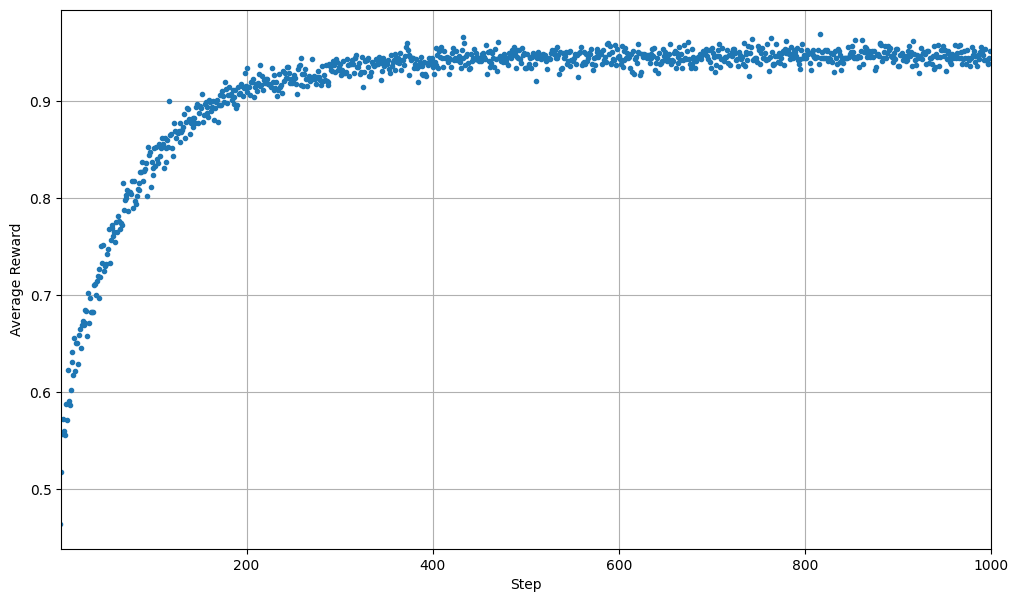

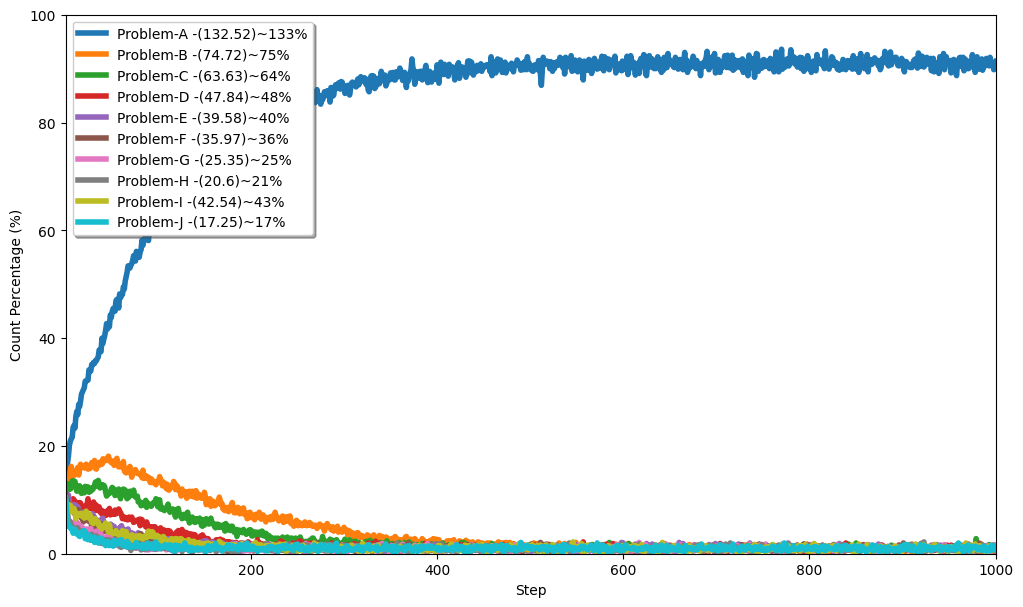

In [20]:
# Plot reward results

# 500 x 1 - each cell is average reward per timestep across all experiments.
# Ideally this increases on average over time as the agent learns. Check rewards.png.
R_avg =  R / float(N_experiments)
plt.plot(R_avg, ".")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.grid()
ax = plt.gca()
plt.xlim([1, N_steps])
#if save_fig:
    #if not os.path.exists(output_dir): os.mkdir(output_dir)
    #plt.savefig(os.path.join(output_dir, "rewards.png"), bbox_inches="tight")
#else:
plt.show()
#plt.close()

# Plot action results
###for i in range(len(probs)):
for i, item in enumerate(list(zip(problem_id, probs))):
    A_pct = 100 * A[:,i] / N_experiments # num_steps x 1 = 500 x 1
    # Each cell is number of times the action i was selected for time step j across all experiments /  number of experiments conducted
    steps = list(np.array(range(len(A_pct)))+1) # [0, 1, 2, 3 , 4, ..., 500]
    # Plotting line chart for just 1 action i at a time.
    ###plt.plot(steps, A_pct, "-", linewidth=4, label="Problem {} ({:.0f}%)".format(i+1, 100*probs[i])) # Incrementing Arm + 1 as they start with 0 index
    plt.plot(steps, A_pct, "-", linewidth=4, label=f'Problem-{item[0]} -({round(100*item[1],2)})~{round(100*item[1])}%') # Incrementing Arm + 1 as they start with 0 index

    # We should ideally see as timesteps go on, the slot with the largest probability of success is chosen the most.
    # check actions.png
plt.xlabel("Step")
plt.ylabel("Count Percentage (%)")
leg = plt.legend(loc='upper left', shadow=True)
plt.xlim([1, N_steps])
plt.ylim([0, 100])
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
#if save_fig:
    #if not os.path.exists(output_dir): os.mkdir(output_dir)
    #plt.savefig(os.path.join(output_dir, "actions.png"), bbox_inches="tight")
#else:
plt.show()
#plt.close()

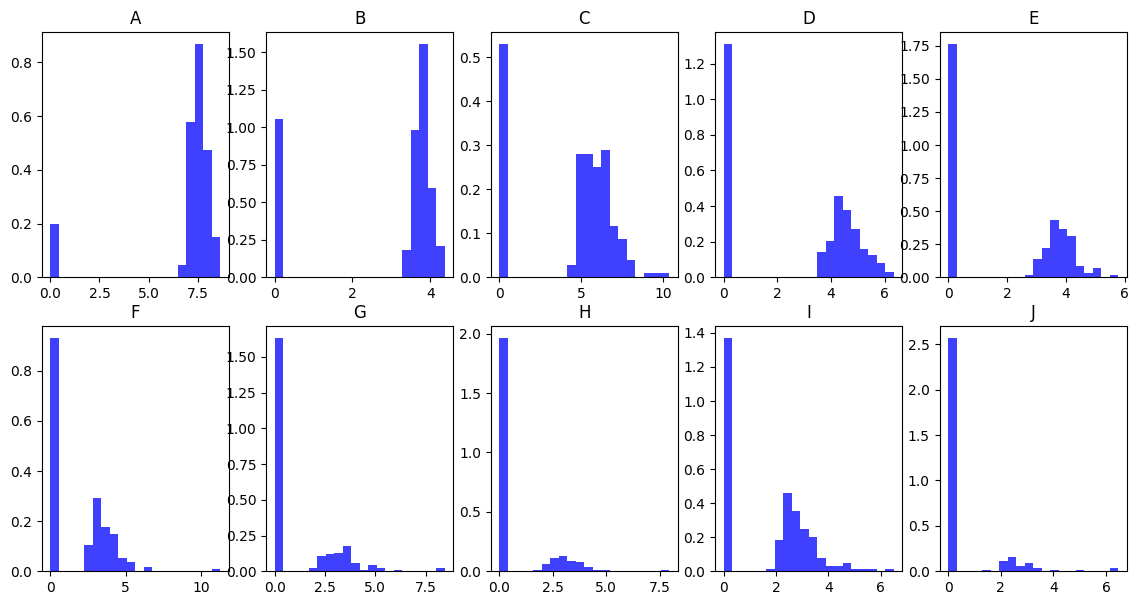

In [44]:
plt.figure(figsize=(14,7))
for i, n in enumerate(df.problem_cls.unique()):
  x_x_x=df["problem_cls"]==n
  #df[x_x_x]['performance']
  plt.subplot(2,5,i+1)
  plt.title(n)

  plt.hist(df[x_x_x]['performance'], 20, density=True, histtype='stepfilled', facecolor='b', alpha=0.75)
plt.show()


In [45]:
ndf.columns

Index(['problems', 'mean', 'std', 'derived_performance', 'normalized', 'proba_f', 'proba_f1'], dtype='object')

In [46]:
df.columns

Index(['milsec', 'problems', 'problem_cls', 'marks', 'performance', 'inv_milsec'], dtype='object')

<Axes: xlabel='marks', ylabel='performance'>

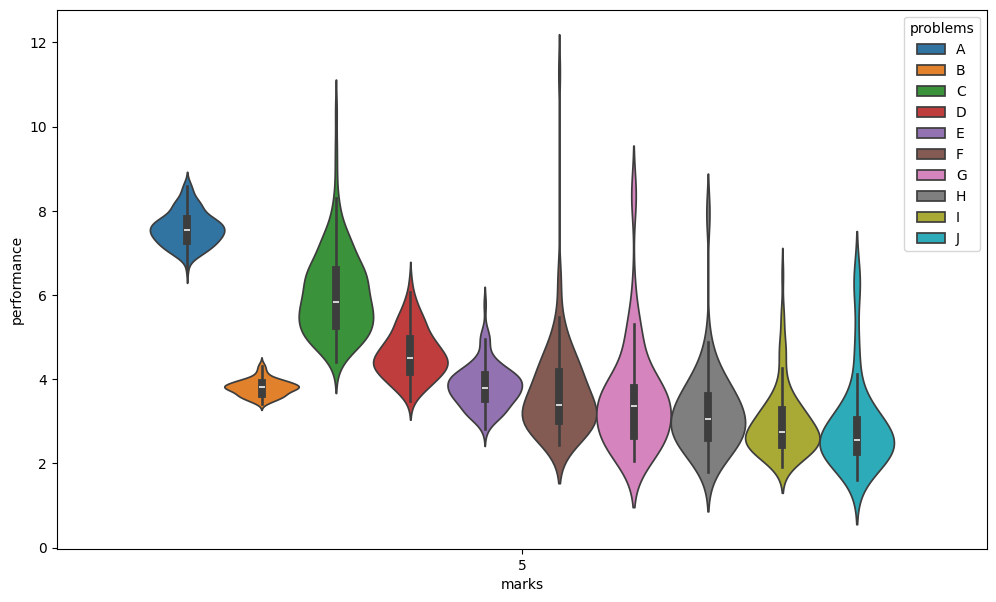

In [55]:
vio_flt=df['marks']==0
vio_df=df[~vio_flt]
sns.violinplot(data=vio_df, x="marks", y="performance", hue="problems", fill=True)

<Axes: ylabel='marks'>

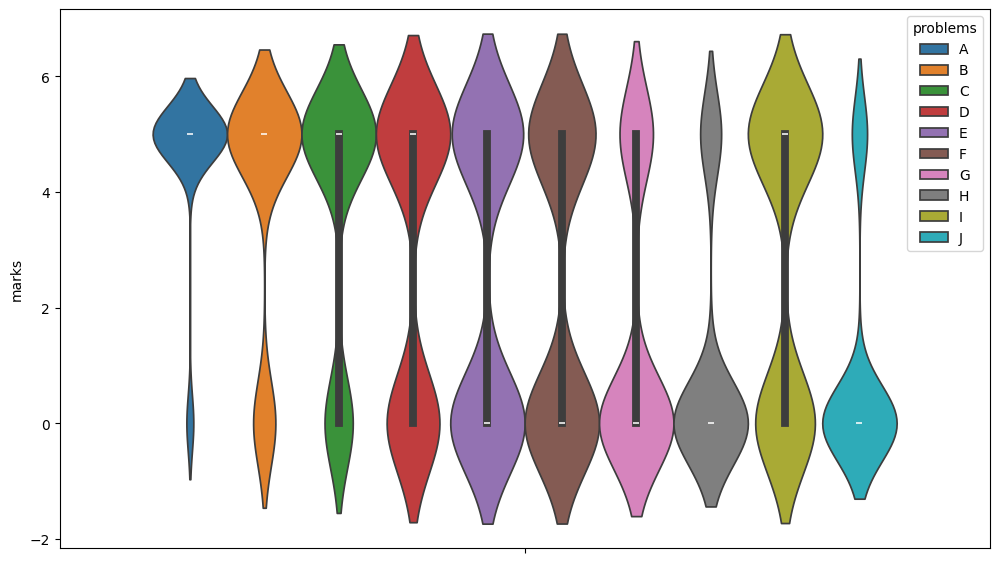

In [48]:
sns.violinplot(data=df, y="marks", hue="problems",fill=True)

<Axes: ylabel='performance'>

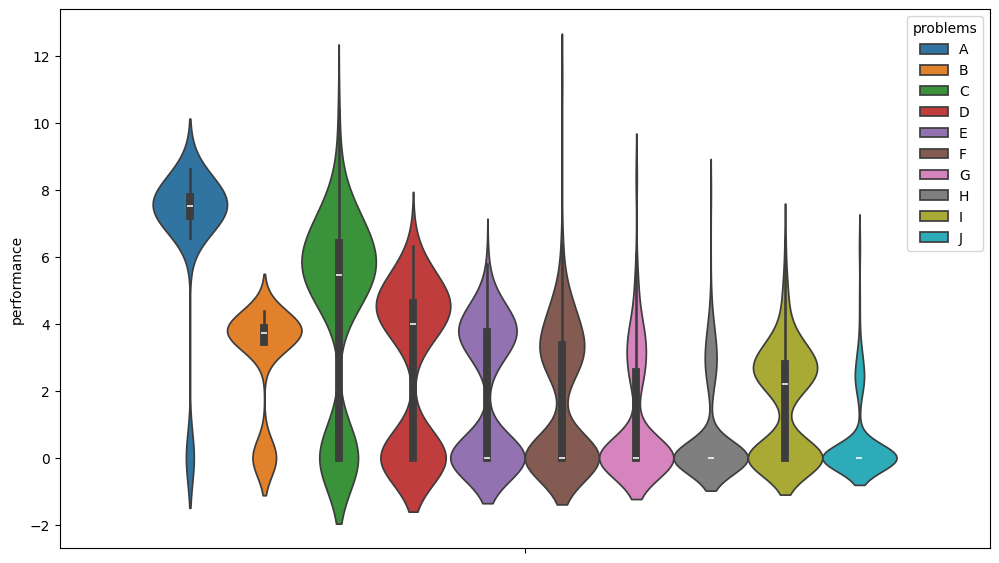

In [49]:
sns.violinplot(data=df, y="performance", hue="problems",fill=True)

<Axes: ylabel='milsec'>

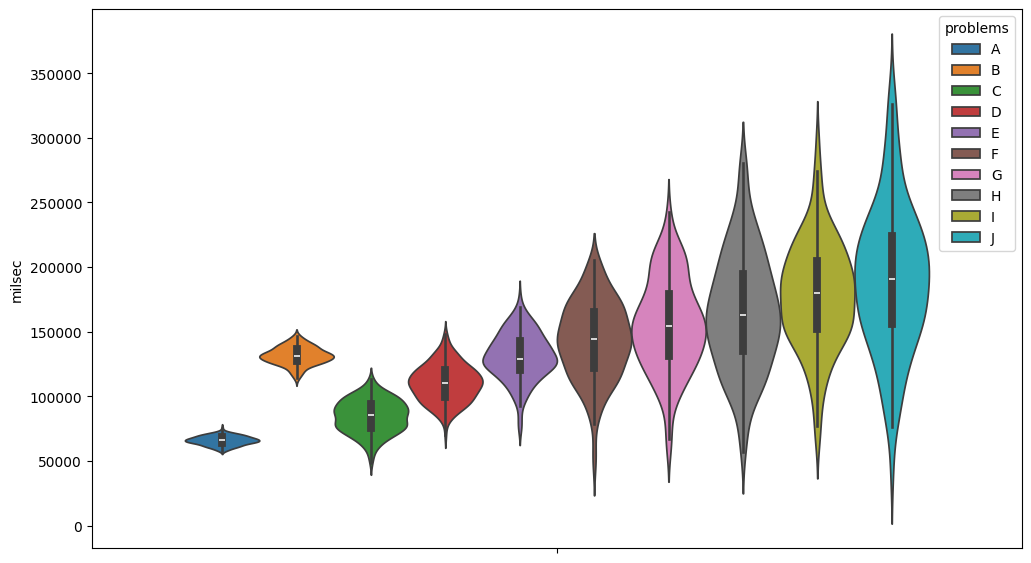

In [50]:
sns.violinplot(data=df, y="milsec", hue="problems",fill=True)